## Import dataset from Kaggle

In [76]:
import kagglehub

path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /Users/keenechung/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2


## Import Libraries

In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from keras.utils import image_dataset_from_directory
from keras import layers, models

In [78]:
print(tf.__version__)
print(keras.__version__)

2.19.0
3.9.0


## Dataset

In [79]:
df_train = pd.read_csv(path + "/Training_set.csv")
df_test = pd.read_csv(path + "/Training_set.csv")

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB


In [81]:
df_train.head(10)

filename                     label
0   Image_1.jpg          SOUTHERN DOGFACE
1   Image_2.jpg                    ADONIS
2   Image_3.jpg            BROWN SIPROETA
3   Image_4.jpg                   MONARCH
4   Image_5.jpg  GREEN CELLED CATTLEHEART
5   Image_6.jpg           CAIRNS BIRDWING
6   Image_7.jpg  GREEN CELLED CATTLEHEART
7   Image_8.jpg      EASTERN DAPPLE WHITE
8   Image_9.jpg            BROWN SIPROETA
9  Image_10.jpg               RED POSTMAN

In [82]:
df_train.shape

(6499, 2)

## Butterfly Species

In [83]:
df_train['label'].nunique()

75

In [84]:
label_list = df_train['label'].unique()
label_list.sort()
print(label_list)

['ADONIS' 'AFRICAN GIANT SWALLOWTAIL' 'AMERICAN SNOOT' 'AN 88' 'APPOLLO'
 'ATALA' 'BANDED ORANGE HELICONIAN' 'BANDED PEACOCK' 'BECKERS WHITE'
 'BLACK HAIRSTREAK' 'BLUE MORPHO' 'BLUE SPOTTED CROW' 'BROWN SIPROETA'
 'CABBAGE WHITE' 'CAIRNS BIRDWING' 'CHECQUERED SKIPPER' 'CHESTNUT'
 'CLEOPATRA' 'CLODIUS PARNASSIAN' 'CLOUDED SULPHUR' 'COMMON BANDED AWL'
 'COMMON WOOD-NYMPH' 'COPPER TAIL' 'CRECENT' 'CRIMSON PATCH'
 'DANAID EGGFLY' 'EASTERN COMA' 'EASTERN DAPPLE WHITE'
 'EASTERN PINE ELFIN' 'ELBOWED PIERROT' 'GOLD BANDED' 'GREAT EGGFLY'
 'GREAT JAY' 'GREEN CELLED CATTLEHEART' 'GREY HAIRSTREAK' 'INDRA SWALLOW'
 'IPHICLUS SISTER' 'JULIA' 'LARGE MARBLE' 'MALACHITE' 'MANGROVE SKIPPER'
 'MESTRA' 'METALMARK' 'MILBERTS TORTOISESHELL' 'MONARCH' 'MOURNING CLOAK'
 'ORANGE OAKLEAF' 'ORANGE TIP' 'ORCHARD SWALLOW' 'PAINTED LADY'
 'PAPER KITE' 'PEACOCK' 'PINE WHITE' 'PIPEVINE SWALLOW' 'POPINJAY'
 'PURPLE HAIRSTREAK' 'PURPLISH COPPER' 'QUESTION MARK' 'RED ADMIRAL'
 'RED CRACKER' 'RED POSTMAN' 'RED SPOTTED 

## Endcode labels

In [85]:
# Encode labels into numeric values
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['label'])
num_classes = len(label_encoder.classes_)

In [86]:
df_train.head()

filename                     label  label_encoded
0  Image_1.jpg          SOUTHERN DOGFACE             66
1  Image_2.jpg                    ADONIS              0
2  Image_3.jpg            BROWN SIPROETA             12
3  Image_4.jpg                   MONARCH             44
4  Image_5.jpg  GREEN CELLED CATTLEHEART             33

In [87]:
df_train[['label_encoded','label']].value_counts().sort_index()

label_encoded  label                    
0              ADONIS                       88
1              AFRICAN GIANT SWALLOWTAIL    75
2              AMERICAN SNOOT               74
3              AN 88                        85
4              APPOLLO                      90
                                            ..
70             ULYSES                       84
71             VICEROY                      81
72             WOOD SATYR                   71
73             YELLOW SWALLOW TAIL          75
74             ZEBRA LONG WING              76
Name: count, Length: 75, dtype: int64

## Preview Images

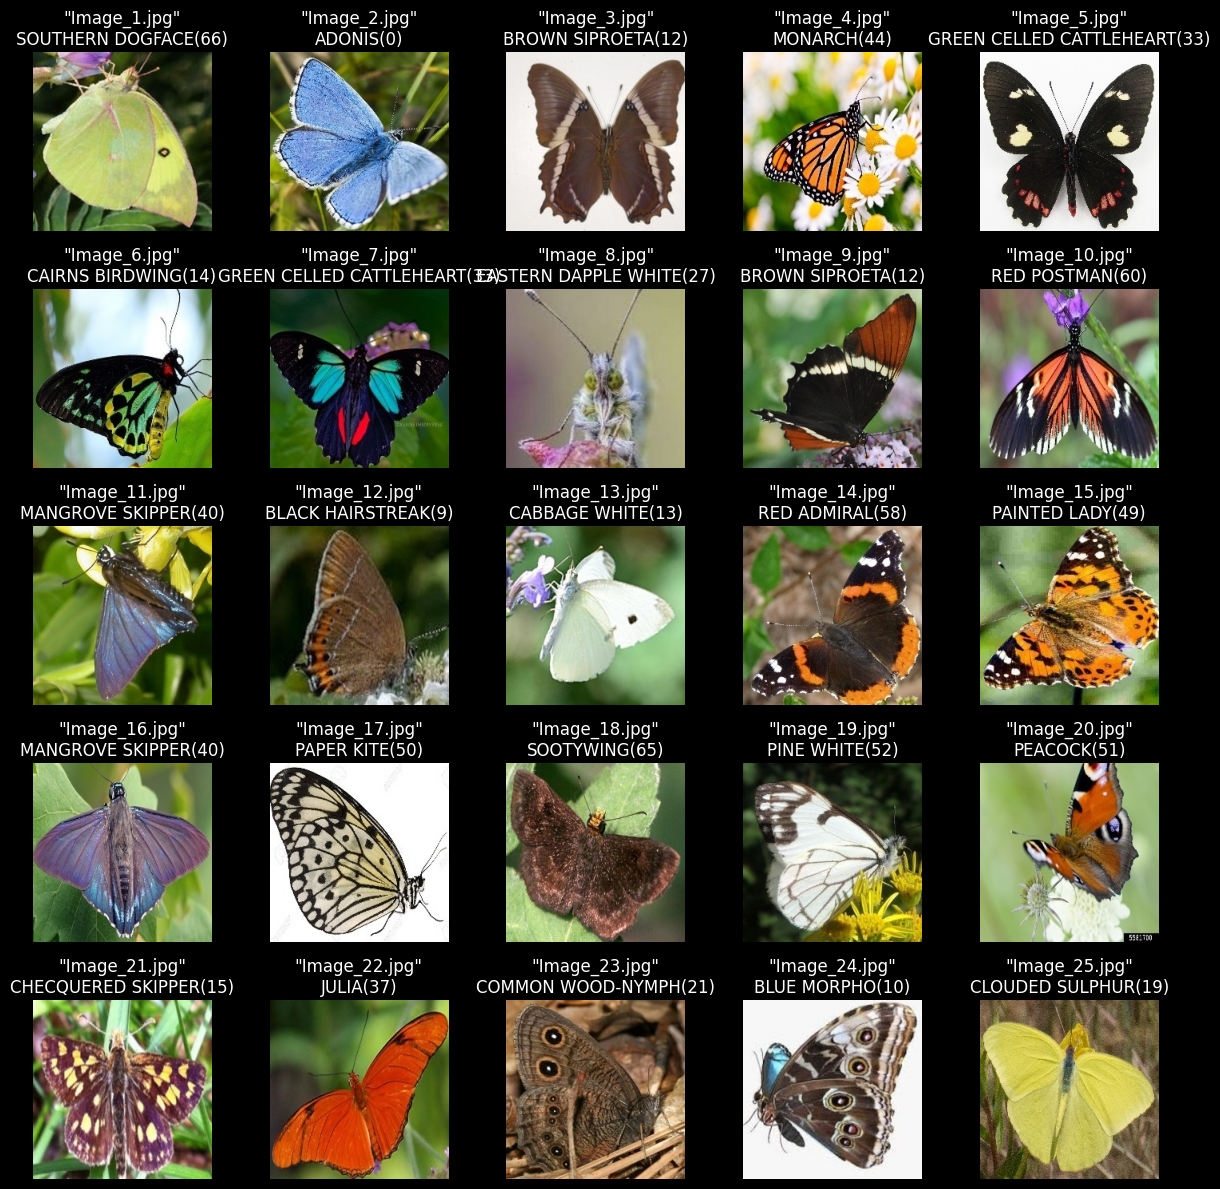

In [88]:
# Preview the first 25 images and their labels
plt.figure(figsize=(12, 12))
for i in range(25):  # 5x5 grid
    filename = df_train.iloc[i]['filename']
    img_path = os.path.join(path + '/train', filename)
    label = df_train.iloc[i]['label']
    code = df_train.iloc[i]['label_encoded']
    img = Image.open(img_path)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f'"{df_train["filename"][i]}"\n{label}({code})')
    plt.axis('off')

plt.tight_layout()
plt.style.use('dark_background')
plt.show()

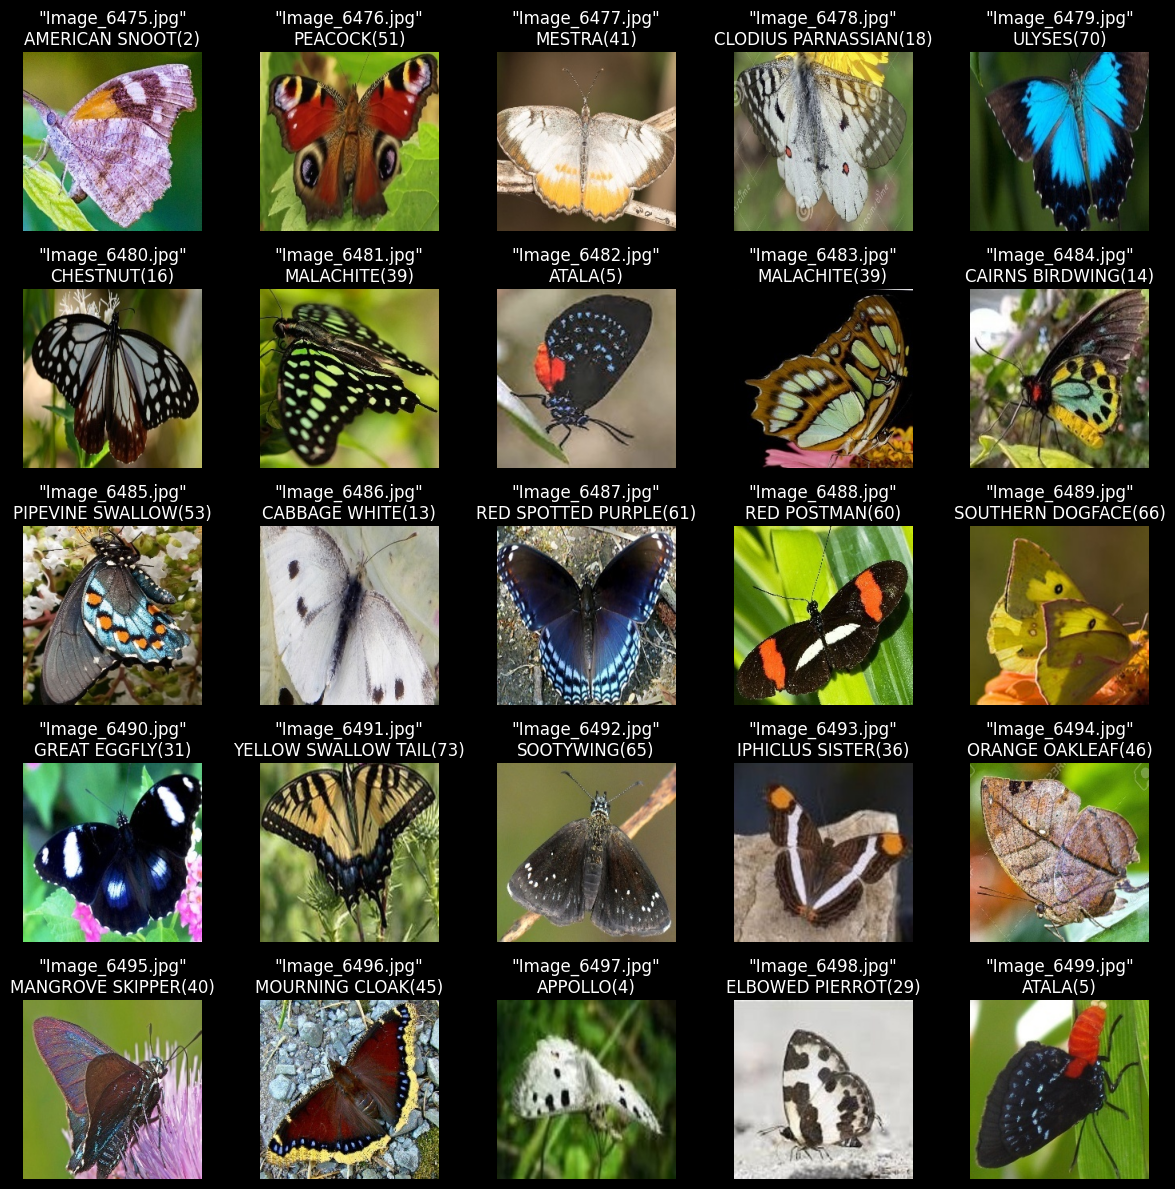

In [89]:
# Preview the last 25 images and their labels
plt.figure(figsize=(12, 12))

start_idx = len(df_train) - 25

for j, i in enumerate(range(start_idx, len(df_train))):  # 5x5 grid
    filename = df_train.iloc[i]['filename']
    img_path = os.path.join(path, 'train', filename)
    label = df_train.iloc[i]['label']
    code = df_train.iloc[i]['label_encoded']
    img = Image.open(img_path)

    plt.subplot(5, 5, j + 1)  # j goes from 0 to 24
    plt.imshow(img)
    plt.title(f'"{df_train["filename"][i]}"\n{label}({code})')
    plt.axis('off')

plt.tight_layout()
plt.style.use('dark_background')
plt.show()